<a href="https://colab.research.google.com/github/andrejuniorba/Projetos_Machine_Learning/blob/main/Modelo_de_regress%C3%A3o_%E2%80%93_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 1.Base de dados

Plan 1 = Base para treino

Plan 2 = Base para previsões

In [2]:
base_dados = pd.read_excel('/content/drive/MyDrive/Dados - Data Science/BaseDados_RegressaoLinear.xlsx', 'Plan1')
base_dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [3]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
#Converter para array
eixo_x = base_dados.iloc[:,0].values
eixo_y = base_dados.iloc[:,1].values

In [6]:
eixo_x

array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

## 2.Visualização

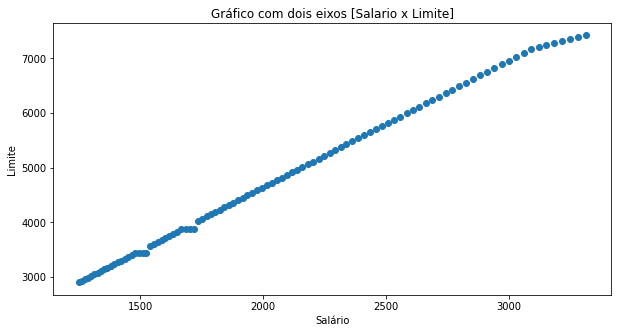

In [9]:
plt.figure(figsize=(10,5))
plt.title('Gráfico com dois eixos [Salario x Limite]')
plt.xlabel('Salário')
plt.ylabel('Limite')
plt.scatter(eixo_x,eixo_y);

## 3.Correlação

In [12]:
correlacao = np.corrcoef(eixo_x, eixo_y)
correlacao

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

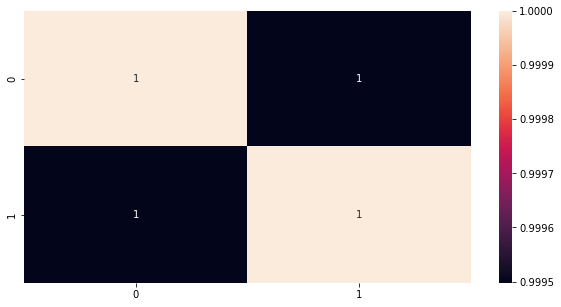

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(correlacao, annot=True);

## 4.Transformar em Matriz

In [15]:
#Transformar em Matriz
eixo_x = eixo_x.reshape(-1,1)
eixo_y = eixo_y.reshape(-1,1)

In [16]:
eixo_x

array([[1250.21913   ],
       [1262.7213213 ],
       [1275.34853451],
       [1288.10201986],
       [1300.98304006],
       [1313.99287046],
       [1327.13279916],
       [1340.40412715],
       [1353.80816843],
       [1367.34625011],
       [1381.01971261],
       [1394.82990974],
       [1408.77820883],
       [1422.86599092],
       [1437.09465083],
       [1451.46559734],
       [1465.98025331],
       [1480.64005585],
       [1495.4464564 ],
       [1510.40092097],
       [1525.50493018],
       [1540.75997948],
       [1556.16757927],
       [1571.72925507],
       [1587.44654762],
       [1603.32101309],
       [1619.35422323],
       [1635.54776546],
       [1651.90324311],
       [1668.42227554],
       [1685.1064983 ],
       [1701.95756328],
       [1718.97713891],
       [1736.1669103 ],
       [1753.52857941],
       [1771.0638652 ],
       [1788.77450385],
       [1806.66224889],
       [1824.72887138],
       [1842.97616009],
       [1861.4059217 ],
       [1880.019

## 5.Dividir os dados em teste e treino

In [17]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    eixo_x,
    eixo_y,
    #dividir 80% dos dados para treinamento e 20% para teste
    test_size = 0.20,
)

print(len(base_dados))
print(len(x_treinamento))
print(len(x_teste))

99
79
20


## 6.Modelo

In [18]:
from sklearn.linear_model import LinearRegression

#Função da regressão linear y=ax+b
funcao_regressao = LinearRegression()
#Treino
funcao_regressao.fit(x_treinamento,y_treinamento)


LinearRegression()

In [19]:
#Peformance
funcao_regressao.score(x_treinamento,y_treinamento)

0.9990594520378565

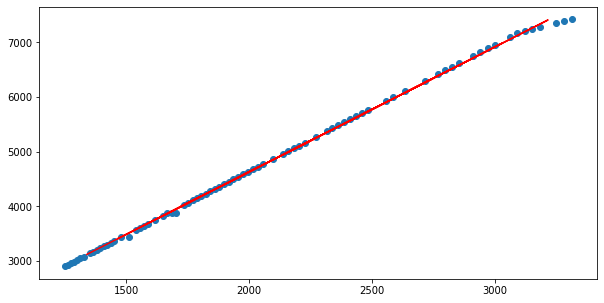

In [21]:
#Reta da regressão
plt.figure(figsize=(10,5))
plt.scatter(x_treinamento,y_treinamento)
plt.plot(x_teste, funcao_regressao.predict(x_teste), color = 'red');

## 7.Avaliando Modelo

In [23]:
previsoes = funcao_regressao.predict(x_teste)

from sklearn import metrics
#Avaliar o erro médio
print('RMSE', np.sqrt(metrics.mean_squared_error(y_teste, previsoes)))

RMSE 48.66789402388099


##8.Previsões Futuras

In [31]:
#Um cliente que ganha R$1200, qual o limite de empréstimo?

funcao_regressao.predict([[1200]])

array([[2799.77717591]])